\author{Fan Jiang, 11310129}

# Introduction

This document is the solution on IIR filter design for the DSP Autumn 2015 session.

In [1]:
%load_ext oct2py.ipython
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# MATLAB Practice

**(1)**

Wp =  0.30000
Ws =  0.50000
Rp =  0.30000
Rs =  45
N =  10

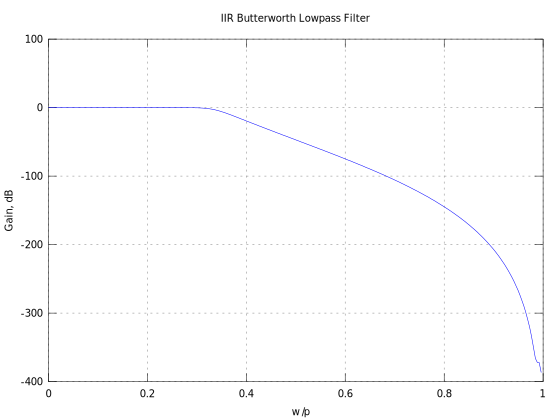

In [3]:
%%octave
clc;
clear all;
close all;
pkg load signal
Wp = 15000/(100000/2)
Ws = 25000/(100000/2)
Rp = 0.3
Rs = 45
[N,Wn] = buttord(Wp, Ws, Rp, Rs);
N
[b,a] = butter(N,Wn);
[h,omega] = freqz(b,a,256);
gain = 20*log10(abs(h));
plot (omega/pi,gain);grid; xlabel('\omega/\pi'); ylabel('Gain, dB'); title('IIR Butterworth Lowpass Filter');

**(2)**

In [8]:
%%octave -o Wh_p,Wh_s,Fs
clc;
clear all;
close all;
Wh_p = tan(2*pi*15000/100000/2)
Wh_s = tan(2*pi*25000/100000/2)
Fs = 100000

Wh_p =  0.50953
Wh_s =  1.00000
Fs =  100000

In [9]:
from scipy.signal import *
N,Q=buttord(2*Fs*Wh_s,2*Fs*Wh_p,0.3,45,analog=True)

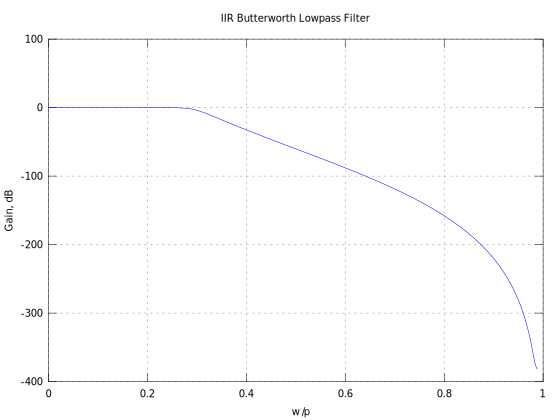

In [10]:
%%octave -i N
Fs=0.5;
[z,p,k]=buttap(N);          % Butterworth filter prototype
[num,den]=zp2tf(z,p,k);     % Convert to transfer function form
[b,a]=bilinear(num,den,Wh_s);   % Analog to Digital conversion
[h,omega] = freqz(b,a,256);
gain = 20*log10(abs(h));
plot (omega/pi,gain);grid; xlabel('\omega/\pi'); ylabel('Gain, dB'); title('IIR Butterworth Lowpass Filter');

**(3)**

Wh_s =  0.41421
Wh_p =  1.00000
Fs =  2000000
num =  1
den =

   1.0e+01 *

  0.10000  0.51258  1.31371  2.18462  2.56884  2.18462  1.31371  0.51258  0.10000

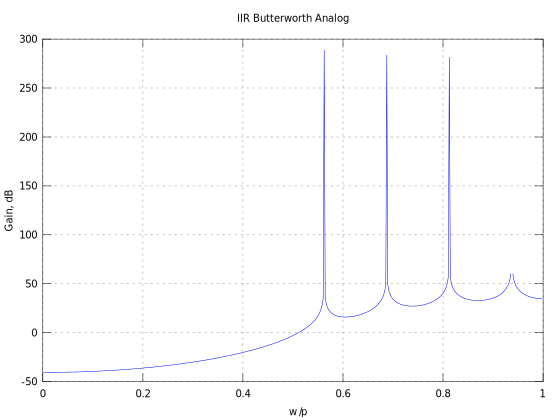

In [11]:
%%octave -o N,num,den,Wh_p
clc;
clear all;
close all;
Wh_s = tan(2*pi*250000/2000000/2)
Wh_p = tan(2*pi*500000/2000000/2)
Fs = 2000000
[N,Wn] = buttord(25/100,50/100, 0.5, 50);
Fs=0.5;
[z,p,k]=buttap(N);          % Butterworth filter prototype
[num,den]=zp2tf(z,p,k)     % Convert to transfer function form
[h,omega] = freqz(num,den);
gain = 20*log10(abs(h));
plot (omega/pi,gain);grid; xlabel('\omega/\pi'); ylabel('Gain, dB'); title('IIR Butterworth Analog');

In [12]:
num,den = lp2hp(num,den[0],Wh_p)

num =

        1        0        0        0        0        0        0        0        0

den =

   1.0e+01 *

  0.10000  0.51258  1.31371  2.18462  2.56884  2.18462  1.31371  0.51258  0.10000

b =

  0.08254  -0.66032  2.31111  -4.62222  5.77778  -4.62222  2.31111  -0.66032  0.08254

a =

  1.00000  -3.26181  5.38654  -5.48864  3.71521  -1.68658  0.49779  -0.08678  0.00681

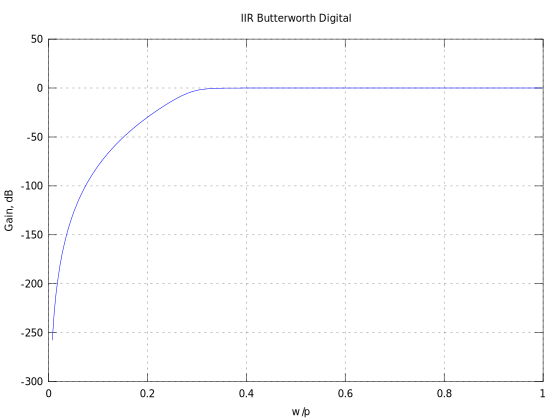

In [13]:
%%octave -i num,den,Wh_p
num
den
[b,a]=bilinear(num,den,1)   % Analog to Digital conversion
[h,omega] = freqz(b,a,256);
gain = 20*log10(abs(h));
plot (omega/pi,gain);grid; xlabel('\omega/\pi'); ylabel('Gain, dB'); title('IIR Butterworth Digital');

# Written Homework


## Question 2

Determine the peak passband ripple $\alpha_p$ and minimum stopband attenuation $\alpha_s$ in dB for peak ripple values $\delta_p=0.04$, and $\delta_s=0.08$.

In [14]:
from IPython.display import Math
Math('\\alpha_p=-20log_{10}(1-\\delta_p)=' + str(-20*log10(1-0.04)))

<IPython.core.display.Math object>

In [15]:
Math('\\alpha_s=-20log_{10}(\\delta_s)=' + str(-20*log10(0.08)))

<IPython.core.display.Math object>

## Question 3

Determine the digital transfer functions obtained by transforming the following causal analog transfer function using the impulse invariance method (assume $T=0.25s$).
\begin{equation}
H_a(s)=\frac{2(s+2)}{(s+3)(s^2+4s+5)}
\end{equation}

In [16]:
import sympy as sp
sp.init_printing()

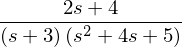

In [17]:
from sympy.polys import partfrac
s=sp.S('s')
equ=2*(s+2)/((s+3)*(s**2+4*s+5))
equ

Solving for its partial fraction yields

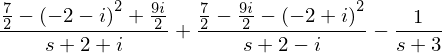

In [18]:
pfd=partfrac.apart(equ,full=True).doit()
pfd

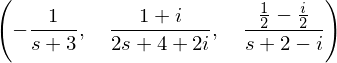

In [19]:
(sp.simplify(pfd.args[0]),sp.simplify(pfd.args[1]),sp.simplify(pfd.args[2]))

\begin{equation}
G(z)=-\frac 1 {1-e^{-3/4}z^{-1}}+\frac {1/2+i/2}{1-e^{-2-i}z^{-1}}+\frac {1/2-i/2} {1-e^{-2+i}z^{-1}}
\end{equation}

## Question 4

The following causal IIR digital transfer function was designed using the bilinear transform with $T=2$. Determine its parent causal analog transfer function.

\begin{equation}
G_a(z)=\frac{4(z^2+z-2)}{10z^2+4z+6}
\end{equation}

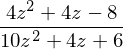

In [20]:
z=sp.S('z')
G=4*(z**2+z-2)/(10*z**2+4*z+6)
G

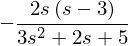

In [21]:
sp.simplify(G.subs(z,(1+s)/(1-s)))